<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Технологический-процесс" data-toc-modified-id="Технологический-процесс-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Технологический процесс</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Технологический процесс

![Без имени.png](<attachment:Без имени.png>)
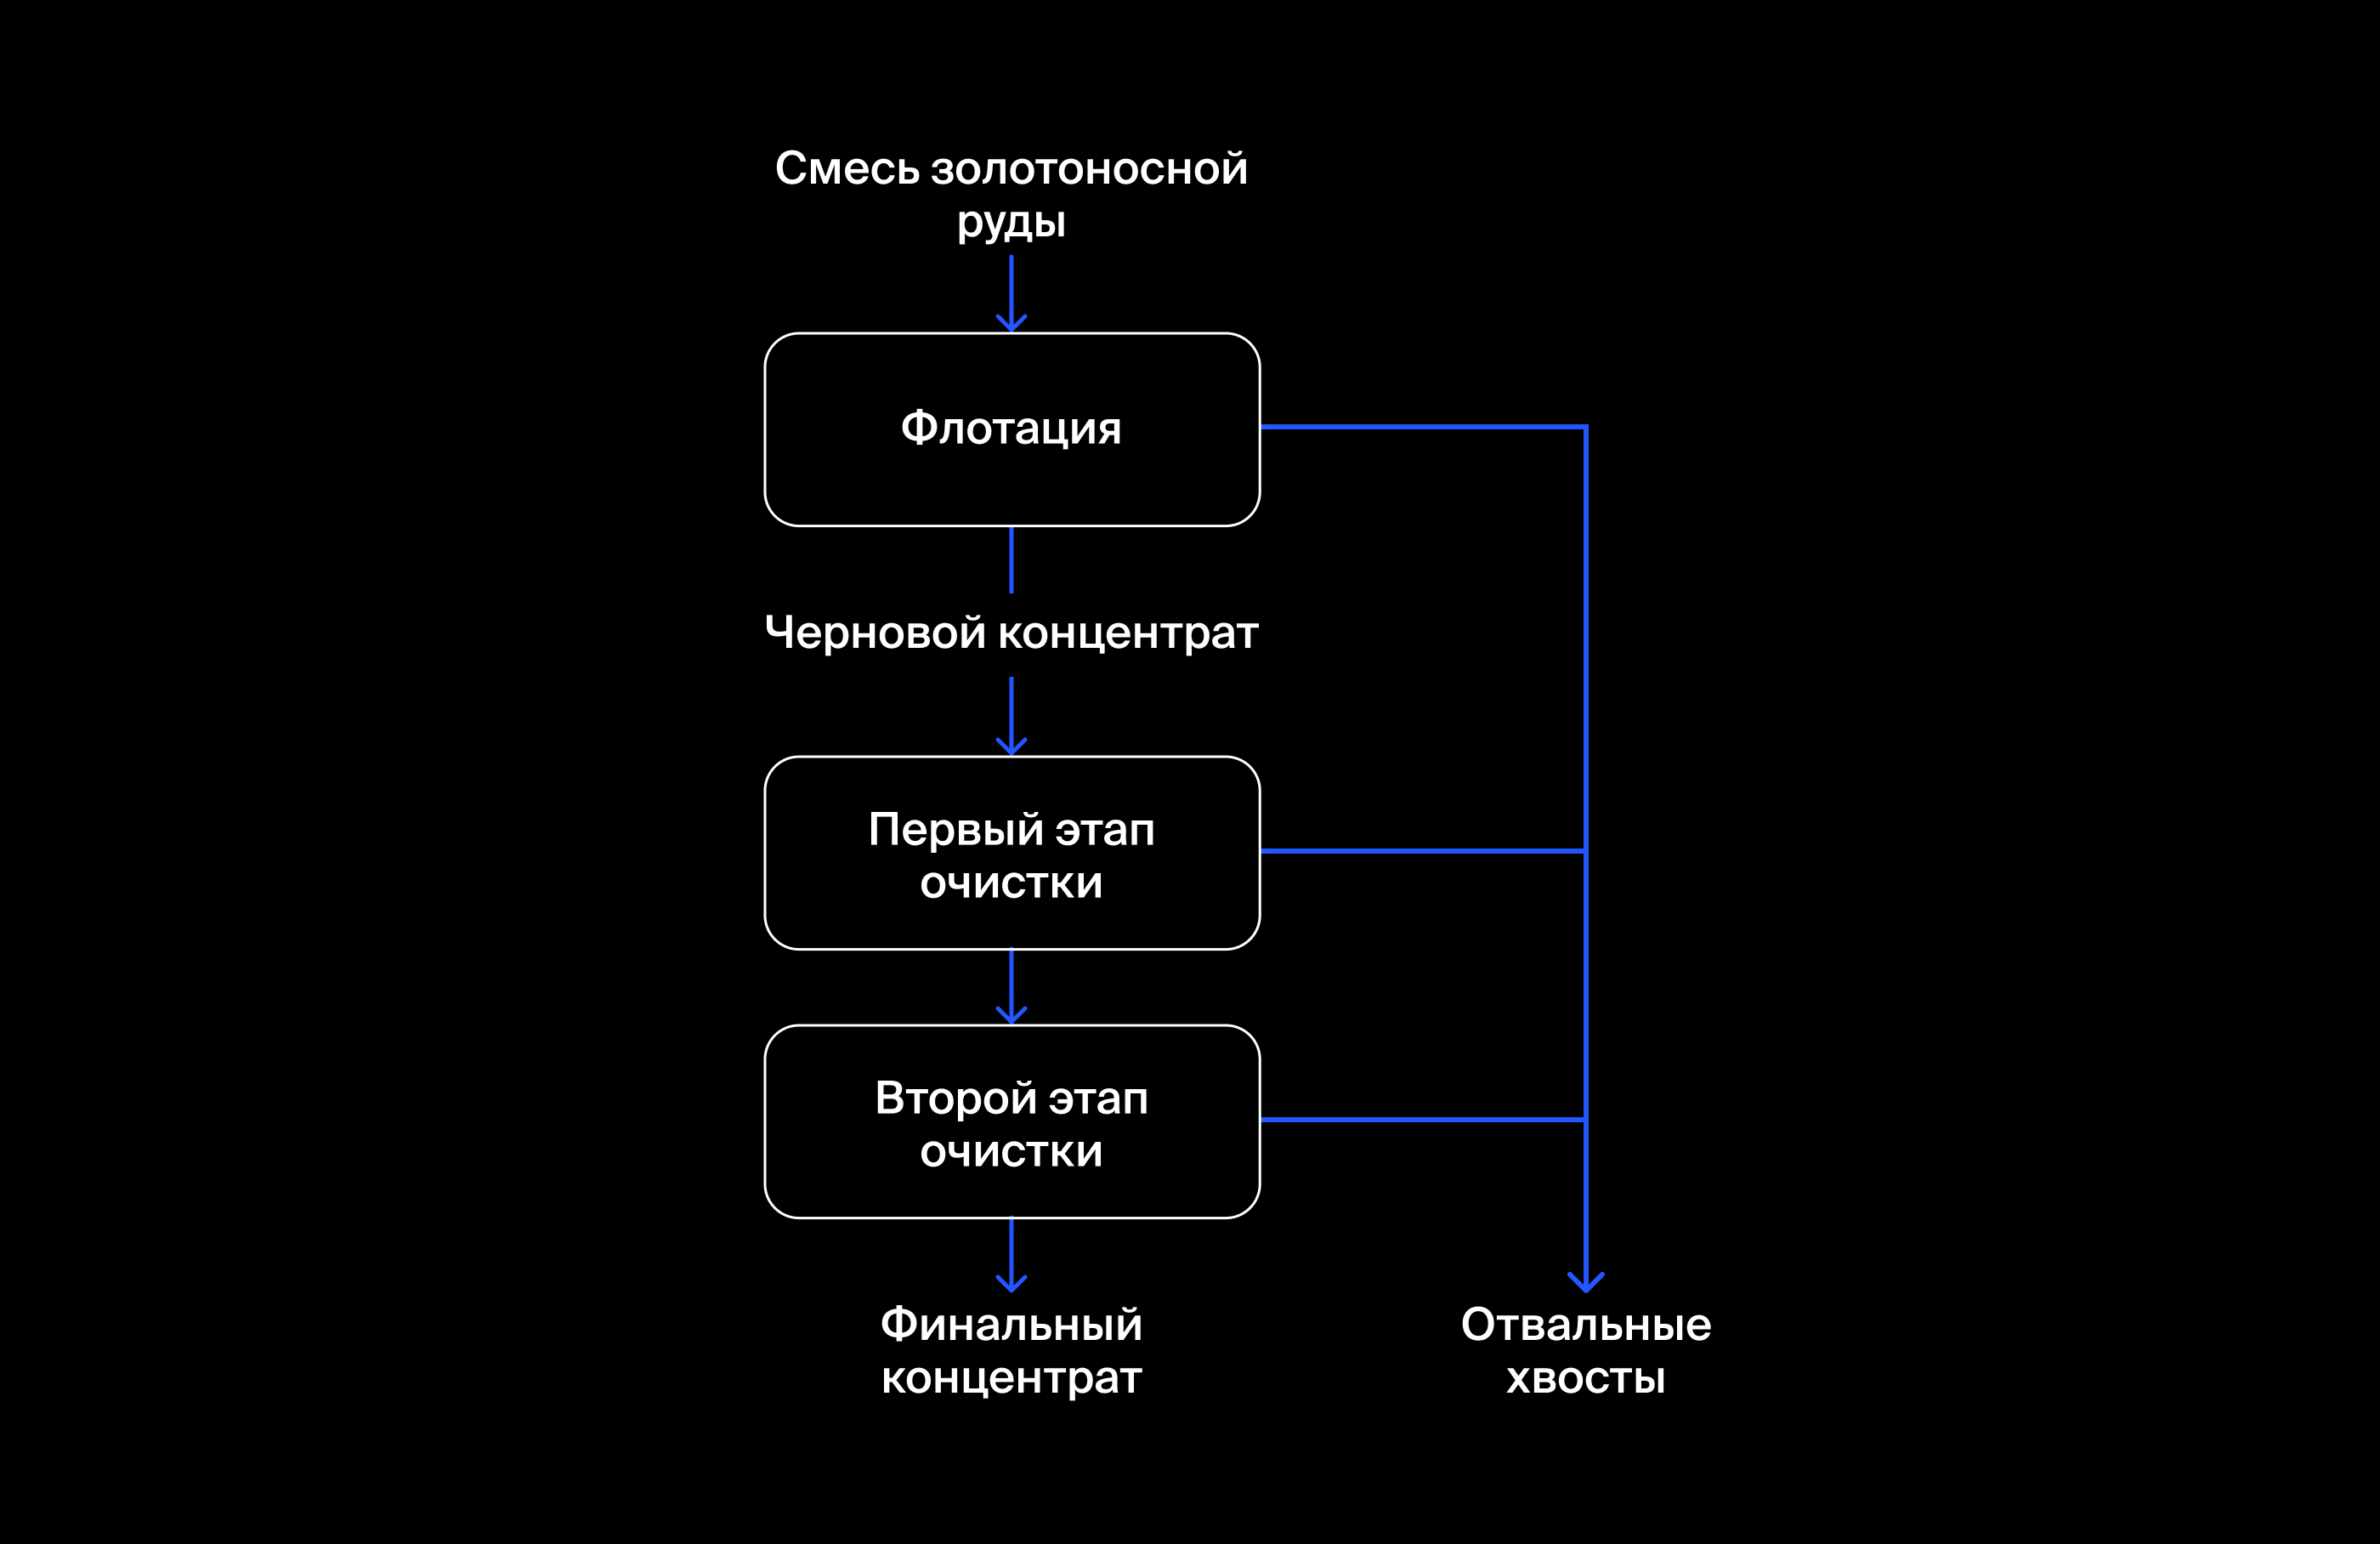
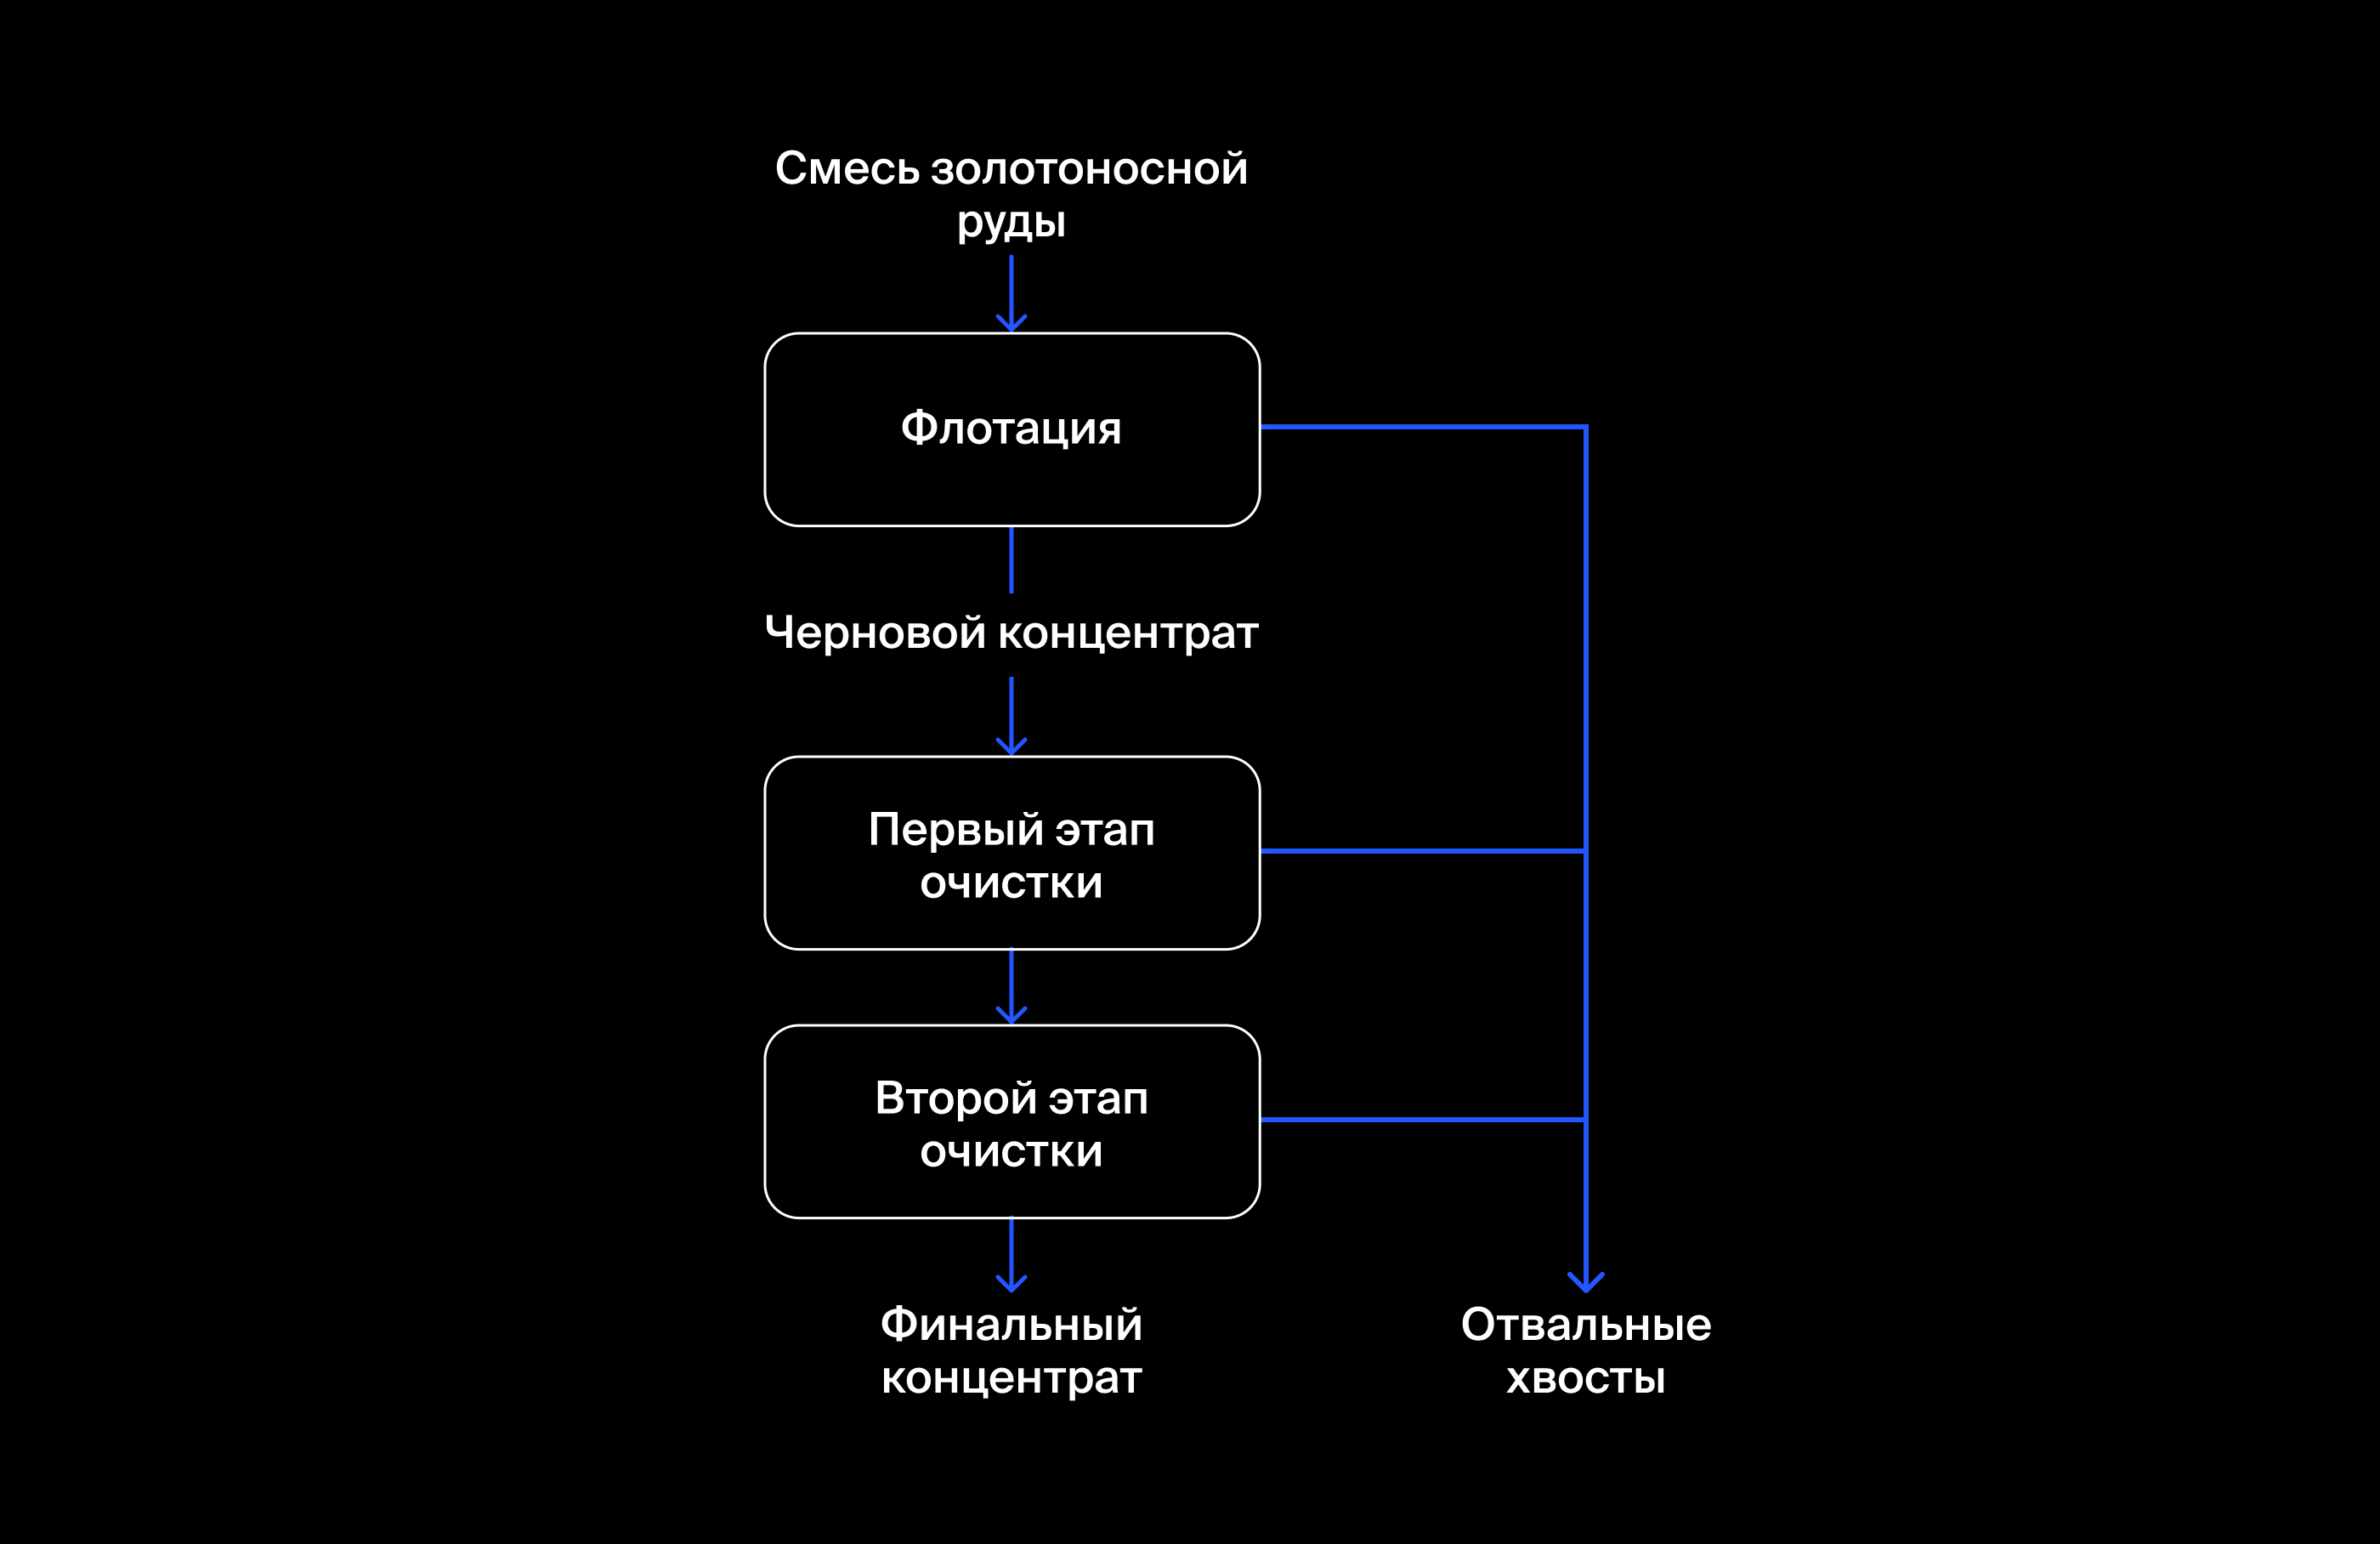

**Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Описание данных

**Наименование признаков**

**[этап].[тип_параметра].[название_параметра]**

Значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-pastel')
import seaborn as sns 
import numpy as np 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

df_list = [df_full, df_train, df_test]

In [3]:
def review(df):
    
    display('Размер таблицы')
    display(df.shape)
    print()
    display('Общая информащия')
    display(df.info())
    print()
    display('Описательная статистика')
    display(df.describe())
    print()
    display('Процент пропусков в признаках')
    display(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)
    print()
    display('Явные дубликаты')
    display(df.duplicated().sum())
    print()
    display('Корреляционная матрица')
    sns.set(rc={'figure.figsize':(40, 40)})
    sns.heatmap(df.corr())
    plt.show()

'Размер таблицы'

(19439, 87)

'Общая информащия'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

'Описательная статистика'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"19,438.00","19,438.00","19,228.00","19,439.00","19,439.00","19,438.00","19,338.00","19,433.00","19,439.00","19,415.00","19,402.00","19,439.00","19,335.00","19,439.00","19,323.00","19,069.00","19,439.00","19,435.00","19,418.00","19,377.00","19,439.00","19,435.00","19,438.00","19,435.00","19,438.00","19,437.00","19,438.00","19,436.00","19,438.00","19,437.00","19,437.00","19,437.00","19,439.00","19,439.00","19,339.00","19,428.00","19,294.00","19,340.00","19,439.00","19,405.00","19,431.00","19,395.00","18,986.00","19,439.00","19,439.00","19,416.00","19,439.00","19,439.00","19,438.00","19,439.00","19,439.00","19,439.00","19,438.00","19,438.00","19,438.00","19,438.00","19,438.00","19,438.00","19,439.00","19,439.00","19,003.00","19,439.00","19,439.00","19,439.00","19,437.00","19,427.00","17,691.00","19,439.00","19,219.00","19,438.00","19,416.00","19,438.00","19,426.00","19,438.00","19,438.00","19,438.00","19,433.00","19,438.00","19,438.00","19,438.00","19,438.00","19,438.00","19,438.00","19,438.00","19,437.00","19,438.00"
mean,5.17,9.98,9.50,44.08,67.05,9.69,2.

'Процент пропусков в признаках'

secondary_cleaner.output.tail_sol                    8.99
rougher.input.floatbank11_xanthate                   2.33
rougher.state.floatbank10_e_air                      2.24
primary_cleaner.output.concentrate_sol               1.90
secondary_cleaner.state.floatbank2_a_air             1.13
final.output.concentrate_sol                         1.09
rougher.input.feed_size                              0.75
primary_cleaner.output.concentrate_pb                0.60
primary_cleaner.input.xanthate                       0.54
final.output.tail_pb                                 0.52
rougher.input.feed_pb                                0.51
rougher.input.feed_sol                               0.51
primary_cleaner.output.tail_sol                      0.32
rougher.input.floatbank11_sulfate                    0.23
primary_cleaner.input.depressant                     0.19
rougher.input.floatbank10_sulfate                    0.17
primary_cleaner.input.sulfate                        0.12
rougher.output

'Явные дубликаты'

0

'Корреляционная матрица'

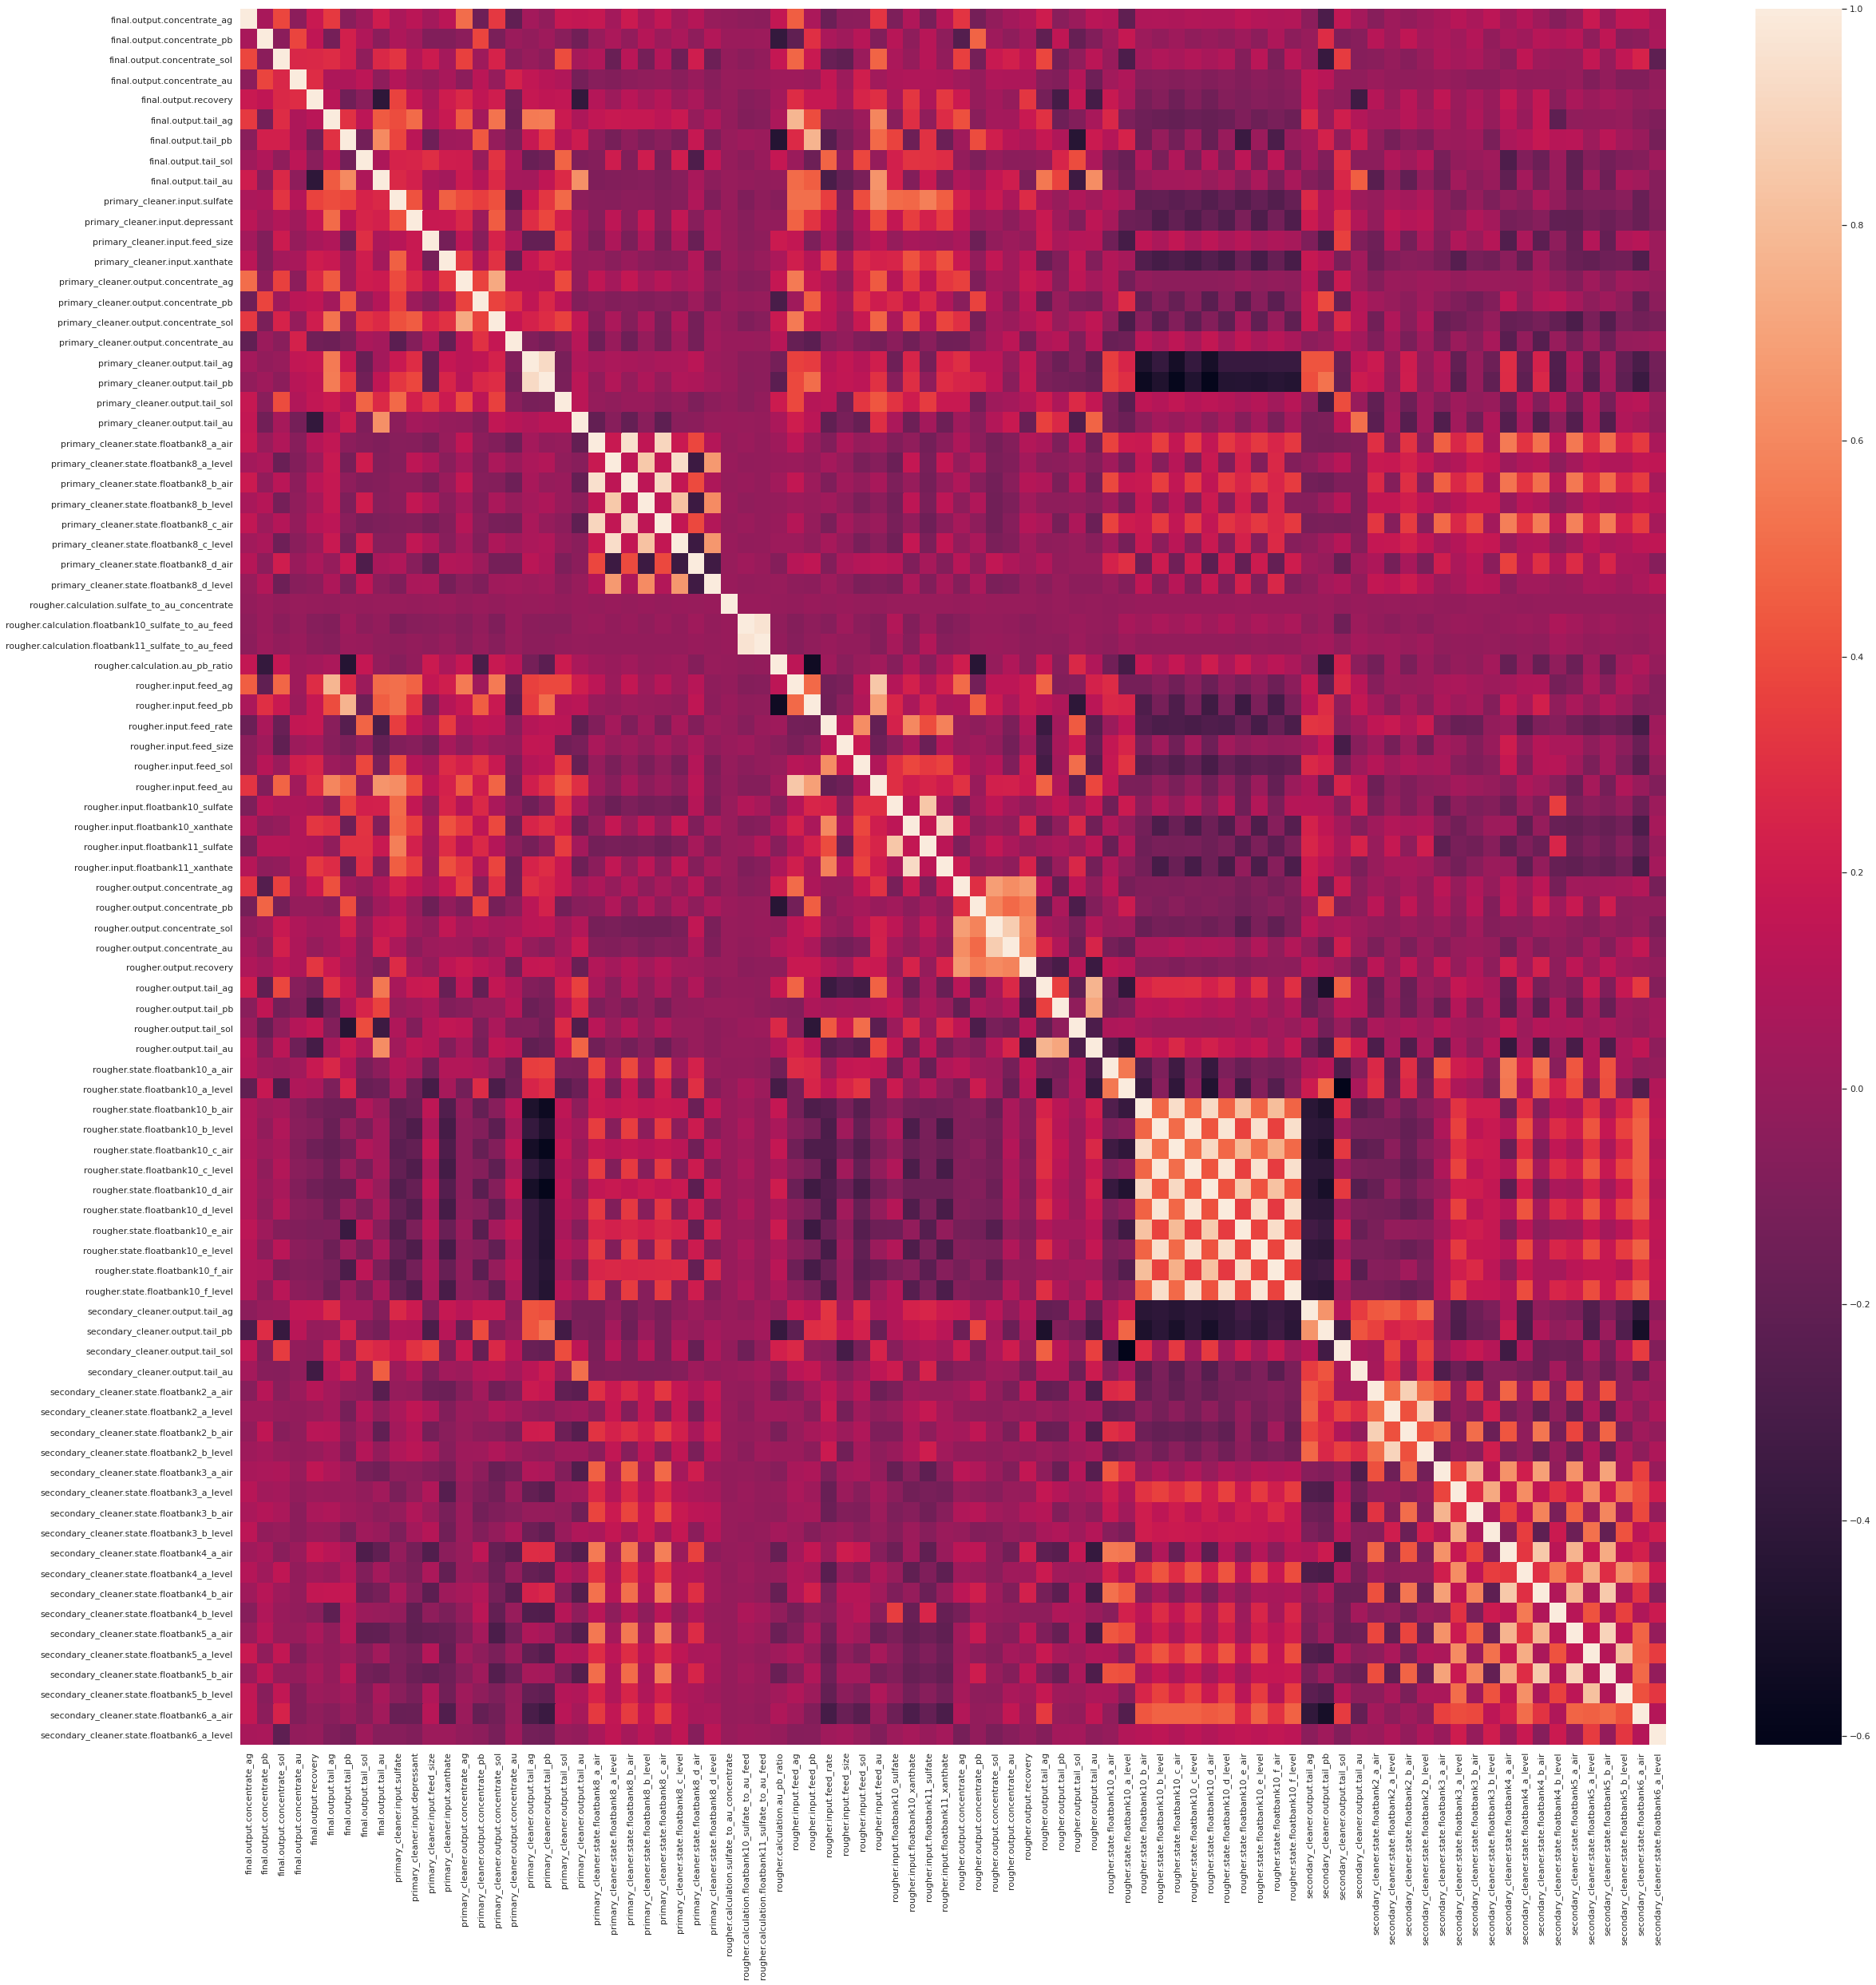

In [4]:
# пройдемся не циклом, чтобы были разные ячейки и было понятнее
review(df_full)

'Размер таблицы'

(14149, 87)

'Общая информащия'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

'Описательная статистика'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"14,148.00","14,148.00","13,938.00","14,149.00","14,149.00","14,149.00","14,049.00","14,144.00","14,149.00","14,129.00","14,117.00","14,149.00","14,049.00","14,149.00","14,063.00","13,863.00","14,149.00","14,148.00","14,134.00","14,103.00","14,149.00","14,145.00","14,148.00","14,145.00","14,148.00","14,147.00","14,148.00","14,146.00","14,148.00","14,148.00","14,148.00","14,148.00","14,149.00","14,149.00","14,049.00","14,141.00","14,005.00","14,071.00","14,149.00","14,120.00","14,141.00","14,113.00","13,721.00","14,149.00","14,149.00","14,127.00","14,149.00","14,149.00","14,148.00","14,149.00","14,149.00","14,149.00","14,148.00","14,148.00","14,148.00","14,148.00","14,148.00","14,148.00","14,149.00","14,149.00","13,713.00","14,149.00","14,149.00","14,149.00","14,147.00","14,139.00","12,544.00","14,149.00","13,932.00","14,148.00","14,128.00","14,148.00","14,145.00","14,148.00","14,148.00","14,148.00","14,143.00","14,148.00","14,148.00","14,148.00","14,148.00","14,148.00","14,148.00","14,148.00","14,147.00","14,148.00"
mean,5.14,10.13,9.20,44.00,66.52,9.61,2

'Процент пропусков в признаках'

secondary_cleaner.output.tail_sol                    11.34
rougher.state.floatbank10_e_air                       3.08
rougher.input.floatbank11_xanthate                    3.02
primary_cleaner.output.concentrate_sol                2.02
secondary_cleaner.state.floatbank2_a_air              1.53
final.output.concentrate_sol                          1.49
rougher.input.feed_size                               1.02
primary_cleaner.input.xanthate                        0.71
rougher.input.feed_pb                                 0.71
final.output.tail_pb                                  0.71
primary_cleaner.output.concentrate_pb                 0.61
rougher.input.feed_sol                                0.55
primary_cleaner.output.tail_sol                       0.33
rougher.input.floatbank11_sulfate                     0.25
primary_cleaner.input.depressant                      0.23
rougher.input.floatbank10_sulfate                     0.20
rougher.output.concentrate_sol                        0.

'Явные дубликаты'

0

'Корреляционная матрица'

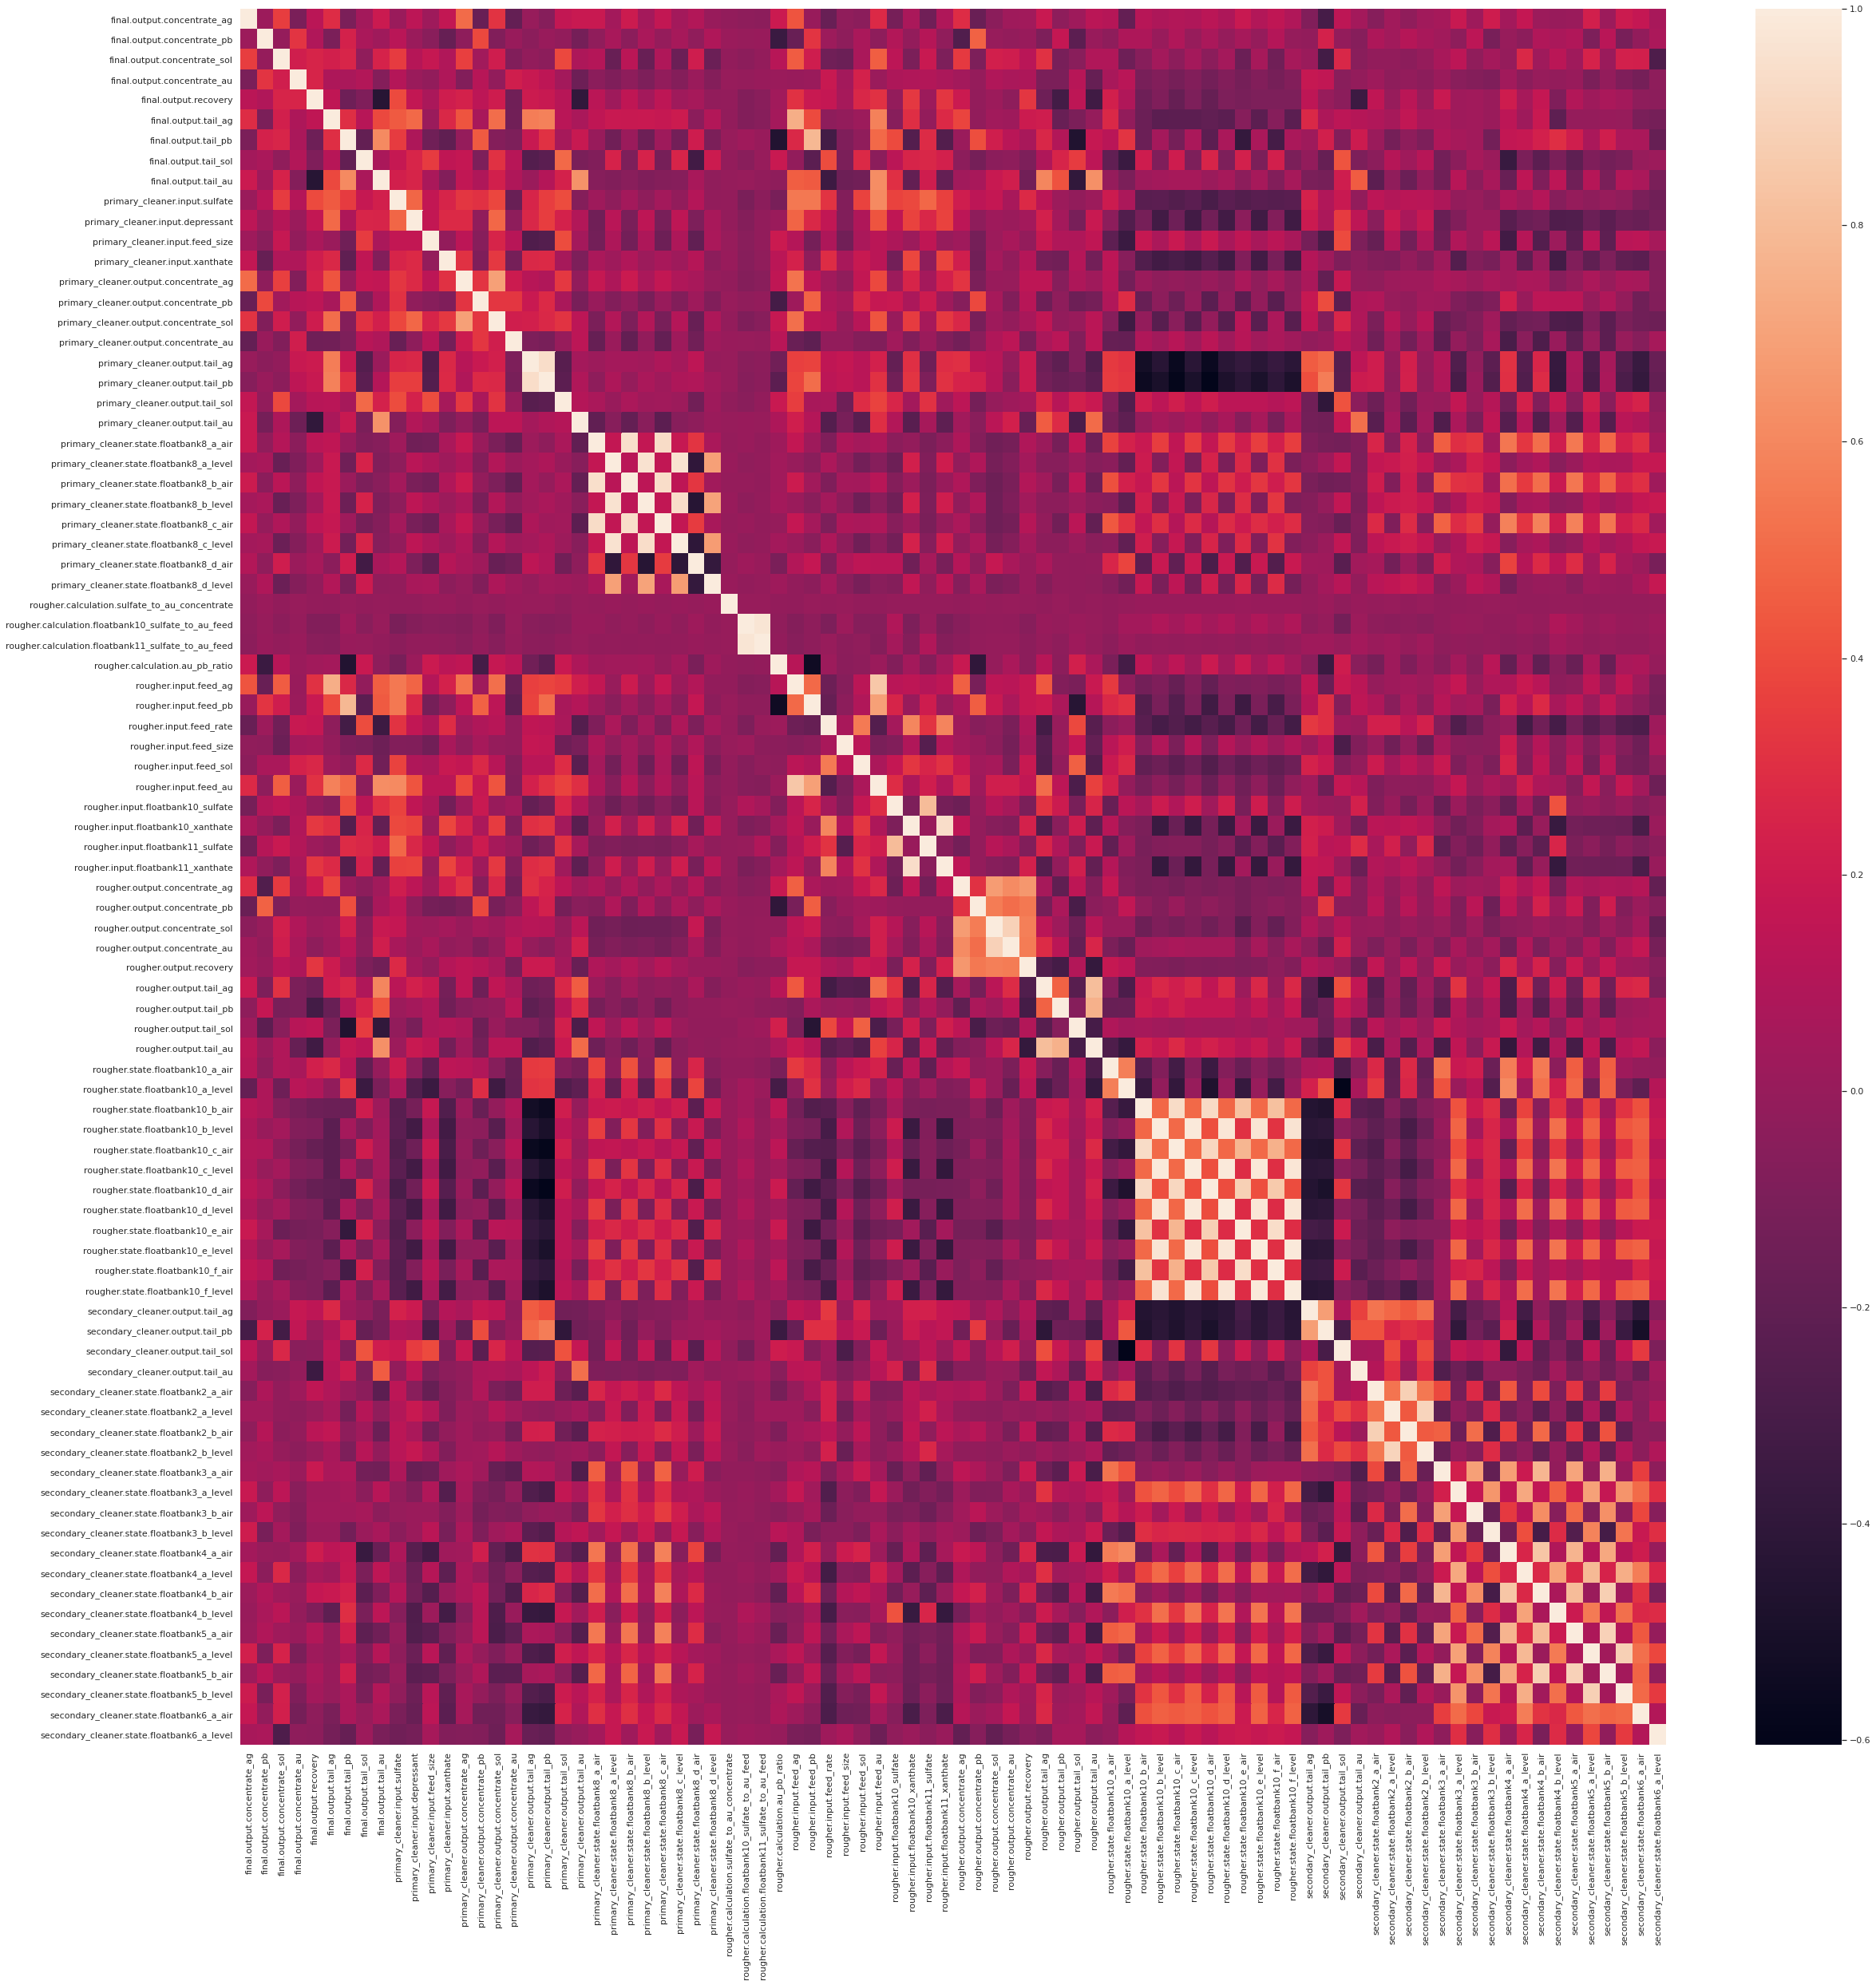

In [5]:
review(df_train)

'Размер таблицы'

(5290, 53)

'Общая информащия'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

'Описательная статистика'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"5,286.00","5,285.00","5,290.00","5,286.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,287.00","5,289.00","5,269.00","5,290.00","5,285.00","5,290.00","5,282.00","5,265.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,287.00","5,290.00","5,288.00","5,290.00","5,281.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00","5,290.00"
mean,174.84,8.68,7.27,1.38,"1,539.49",-497.67,"1,545.17",-500.27,"1,527.27",-498.33,"1,544.84",-500.20,9.37,3.80,489.80,55.95,37.72,9.33,13.86,6.47,13.92,6.51,"1,053.40",-395.73,"1,318.93",-475.24,"1,301.60",-474.84,"1,214.85",-475.68,"1,056.65",-469.03,997.95,-470.48,26.31,-502.75,21.95,-501.99,25.40,-507.49,20.98,-506.63,16.32,-505.14,13.74,-463.35,12.80,-501.33,9.88,-495.66,17.30,-501.79
std,43.03,3.07,0.61,0.64,116.80,19.95,122.22,32.97,122.54,21.96,124.77,31.05,1.93,0.95,108.04,19.08,5.49,1.62,3.35,1.07,3.22,0.89,121.14,91.09,156.45,45.65,171.27,45.86,185.76,47.84,131.54,59.33,128.22,60.76,3.43,28.76,4.35,34.58,6.53,47.62,6.74,44.53,3.49,31.43,3.43,86.19,3.03,17.95,2.87,34.54,4.54,39.04
min,2.57,0.00,5.65,0.00,0.00,-795.32,0.00,-800.00,0.00,-799.96,0.00,-799.79,0.57,0.27,0.00,0.05,1.39,0.57,0.00,0.00,0.00,0.01,-0.04,-657.95,-0.72,-650.25,-0.06,-647.54,-0.99,-648.39,-1.98,-649.27,-2.59,-649.95,0.21,-784.09,0.01,-797.78,0.00,-799.76,0.00,-809.33,0.00,-799.80,0.00,-800.84,0.07,-797.32,0.53,-800.22,-0.08,-809.74
25%,147.12,6.49,6.89,0.91,"1,498.94",-500.36,"1,498.97",-500.70,"1,473.23",-501.02,"1,499.48",-500.45,8.11,3.24,407.02,43.91,34.51,8.21,12.00,6.00,12.00,6.00,999.21,-499.92,"1,200.87",-500.26,"1,199.65",-500.23,"1,093.37",-500.44,999.36,-500.19,901.02,-500.62,24.94,-500.21,20.00,-500.22,22.98,-500.30,17.97,-500.15,14.04,-500.87,12.03,-500.32,10.91,-500.73,8.04,-500.19,14.00,-500.69
50%,177.83,8.05,7.25,1.20,"1,585.13",-499.97,"1,595.62",-500.03,"1,549.59",-500.02,"1,594.58",-500.02,9.76,3.74,499.05,50.84,37.98,9.5

'Процент пропусков в признаках'

rougher.input.floatbank11_xanthate           0.47
rougher.input.feed_sol                       0.40
secondary_cleaner.state.floatbank3_a_air     0.17
rougher.input.floatbank11_sulfate            0.15
primary_cleaner.input.depressant             0.09
rougher.input.floatbank10_sulfate            0.09
primary_cleaner.input.xanthate               0.08
primary_cleaner.input.sulfate                0.08
rougher.input.feed_rate                      0.06
secondary_cleaner.state.floatbank2_a_air     0.06
secondary_cleaner.state.floatbank2_b_air     0.04
rougher.input.feed_size                      0.02
secondary_cleaner.state.floatbank2_b_level   0.00
rougher.state.floatbank10_f_level            0.00
rougher.state.floatbank10_f_air              0.00
secondary_cleaner.state.floatbank3_a_level   0.00
secondary_cleaner.state.floatbank2_a_level   0.00
date                                         0.00
rougher.state.floatbank10_e_air              0.00
secondary_cleaner.state.floatbank3_b_air     0.00


'Явные дубликаты'

0

'Корреляционная матрица'

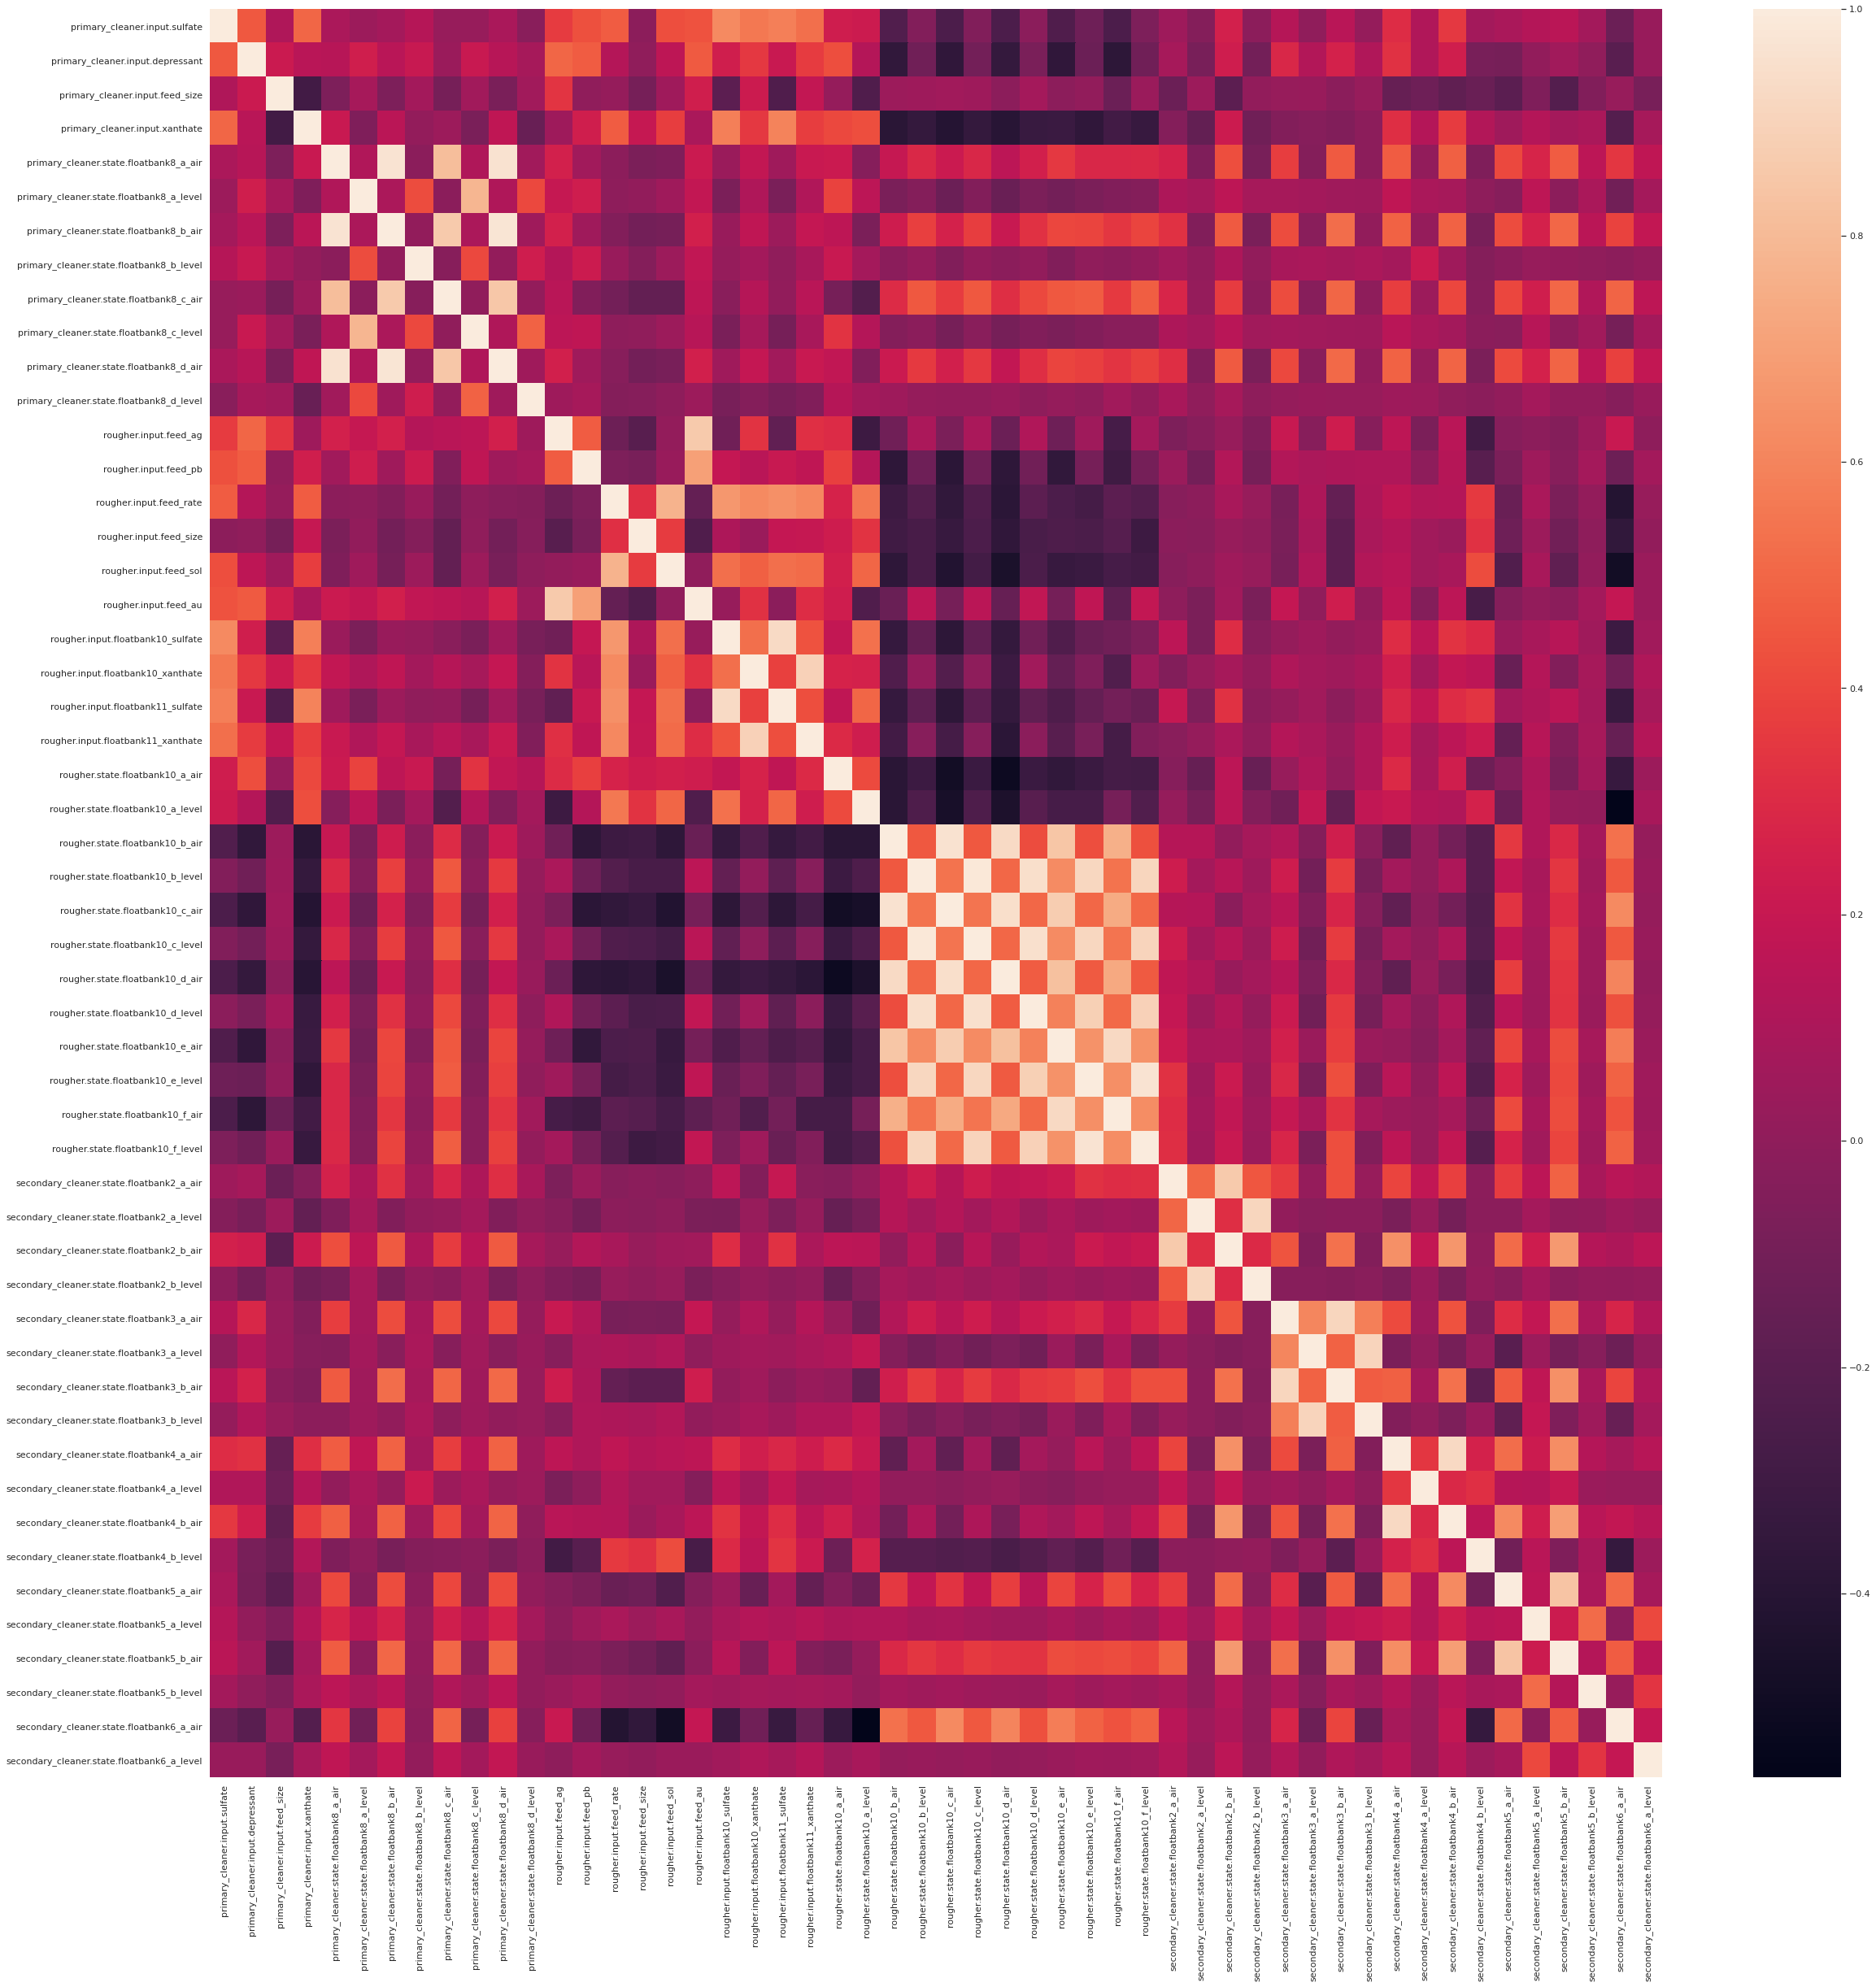

In [6]:
review(df_test)

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между нашими расчётами и значением признака.

![Без имени-1.png](<attachment:Без имени-1.png>)
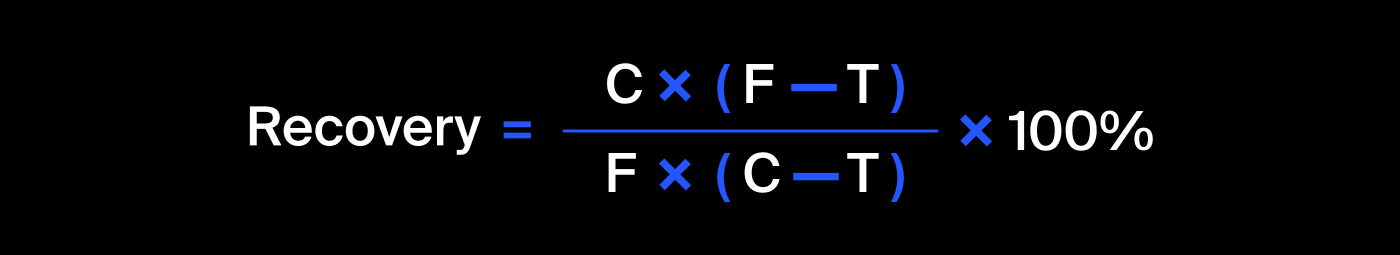
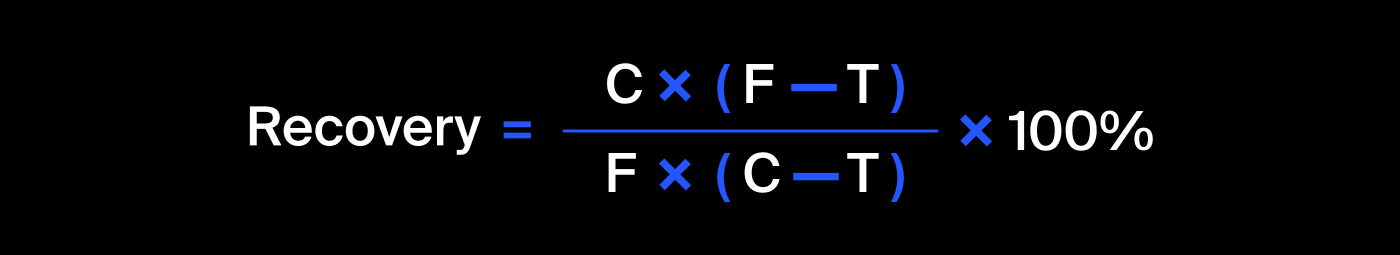

где:

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки

In [7]:
def rougher_output_recovery(C, F, T):
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

In [8]:
feed_au = df_train['rougher.input.feed_au'] # F
concentrate_au = df_train['rougher.output.concentrate_au'] # C
tail_au = df_train['rougher.output.tail_au'] # T

recovery = df_train['rougher.output.recovery']

efficiency = rougher_output_recovery(concentrate_au, feed_au, tail_au) # эффективность
mae = mean_absolute_error(recovery, efficiency) # средняя абсолютная ошибка

In [9]:
print(f'Эффективность обогащения: {efficiency}')
print()
print(f'MAE: {mae}')

Эффективность обогащения: 0       87.11
1       86.84
2       86.84
3       87.23
4       86.69
         ... 
14144   89.57
14145   87.72
14146   88.89
14147   89.86
14148   89.51
Length: 14149, dtype: float64

MAE: 9.73512347450521e-15


Подтвердили точность рассчетов эффективности с помощью метрики MAE. MAE - низкий, расчеты - верны.

Посмотрим на тестовую выборку поближе, а в особенности на пропущенные значения.

In [10]:
out_of_reach = ['date']
out_of_reach.extend([i for i in df_train.columns if i not in df_test.columns])
display(out_of_reach)
print()
print(f'Всего пропущенных признаков: {len(out_of_reach)}')

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.


Всего пропущенных признаков: 35


В информации по датасетам говорилось: 'некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже". 

- 30 признаков относятся к параметрам продукта, 4 к расчетным характеристикам
- В тестовой выборке на всех этапах отсутствует информация о хвостовых частях, о доле металлов (кроме повторной очистки), нет признаков обогащения на финальном этапе и этапе флотации, нет данных о некоторых реагентах на этапе флотации

Посмотрим на пропуски.

In [11]:
df_train.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [12]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Данные распределены по времени, значит удалять строки нельзя. Медианным и средним значением заполнять тоже не получится. А вот заполнить пропуски соседними значениями - можно попробовать. Тогда сначала посмотрим на соседние значения.

In [13]:
display(
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank6_a_level'].isna()].index - 1], 
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank6_a_level'].isna()].index],
    df_full.loc[df_full[df_full['secondary_cleaner.state.floatbank6_a_level'].isna()].index + 1]
)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
113,2016-01-21 09:00:00,5.52,11.00,9.16,43.72,70.77,11.67,2.16,17.31,3.15,182.18,14.98,7.25,1.20,10.97,9.77,20.20,31.89,17.50,3.99,8.06,3.23,"1,545.48",-499.40,"1,545.33",-499.60,"1,551.12",-500.06,"1,547.66",-499.96,"39,994.39","3,210.02","3,148.85",2.35,10.68,3.90,616.37,65.95,41.56,9.19,18.15,7.80,18.12,7.79,12.99,7.94,28.43,19.59,84.83,5.53,0.89,18.96,2.31,"1,000.77",-499.01,"1,599.80",-500.74,"1,599.38",-500.01,"1,401.53",-500.54,"1,200.06",-500.16,"1,099.52",-500.10,16.36,5.67,12.16,3.35,25.01,-499.51,23.01,-498.69,24.07,-498.89,22.97,-499.78,13.95,-564.67,11.91,-570.81,10.00,-509.67,8.06,-500.40,11.96,-599.14


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,5.78,10.97,9.30,43.18,74.26,11.96,2.06,15.14,3.09,NaN,NaN,7.25,NaN,11.35,9.42,20.28,31.33,17.51,3.97,7.85,3.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.37,12.03,4.20,NaN,NaN,41.78,9.95,NaN,NaN,NaN,NaN,13.68,7.79,28.78,19.65,86.22,6.06,0.86,19.77,2.44,NaN,NaN,NaN,NaN,NaN,NaN,"1,393.74",-501.36,"1,196.52",-505.32,"1,097.01",-499.42,16.13,5.43,12.12,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
115,2016-01-21 11:00:00,6.29,10.80,9.87,42.87,72.59,11.98,1.99,15.43,3.31,226.48,15.99,7.25,1.18,11.82,9.10,20.80,30.59,17.79,4.05,8.07,3.17,"1,551.48",-500.30,"1,552.26",-500.39,"1,551.03",-501.08,"1,548.02",-498.25,"41,926.43","3,214.01","3,203.60",2.39,12.16,4.19,629.87,64.64,42.30,10.02,21.21,7.82,21.20,7.78,13.87,7.78,29.02,19.85,84.77,6.56,0.90,20.23,2.67,"1,001.88",-499.98,"1,601.86",-498.61,"1,600.15",-497.10,"1,404.01",-499.83,"1,202.26",-498.30,"1,102.08",-499.36,16.74,5.30,12.32,3.37,25.04,-500.53,22.97,-499.16,24.02,-496.33,22.97,-500.76,14.08,-548.46,11.98,-549.29,10.12,-488.77,7.97,-500.08,12.04,-598.39


*Смотрим на последний столбик.* Значения и вправду расположены близко. Значит можно заполнить предыдущим значением.

In [14]:
df_train = df_train.sort_values(by='date').ffill()
df_test = df_test.sort_values(by='date').ffill()

*Проверка, что всё заполнилось* 

In [15]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [16]:
df_train.isna().sum()

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Проверим, что ничего не пропало в датасетах.

In [17]:
print(df_full.shape, df_train.shape, df_test.shape, sep='\n')
print(df_full.shape[0], df_train.shape[0] + df_test.shape[0])

(19439, 87)
(14149, 87)
(5290, 53)
19439 19439


Всё на месте. 

**Вывод:**

1. Всего 22716 объектов и 87 признаков
2. В тестовой выборке на всех этапах отсутствует информация о хвостовых частях, о доле металлов (кроме повторной очистки), нет признаков обогащения на финальном этапе и этапе флотации, нет данных о некоторых реагентах на этапе флотации
3. В данных нет явных дубликатов.
4. С типами данных всё окей.
5. MAE для столбца rougher.output.recovery получилось маленькое, значит эффективность рассчитана верно.
6. Пропущенные значения были заполнены предыдущими значениями, тк данные идут по порядку, по времени.

**Технологический процесс**

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи


## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [18]:
df_full.columns[df_full.columns.str.endswith('au')]

Index(['final.output.concentrate_au', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_au', 'rougher.input.feed_au',
       'rougher.output.concentrate_au', 'rougher.output.tail_au',
       'secondary_cleaner.output.tail_au'],
      dtype='object')

In [19]:
df_full.columns[df_full.columns.str.endswith('ag')]

Index(['final.output.concentrate_ag', 'final.output.tail_ag',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.tail_ag', 'rougher.input.feed_ag',
       'rougher.output.concentrate_ag', 'rougher.output.tail_ag',
       'secondary_cleaner.output.tail_ag'],
      dtype='object')

In [20]:
df_full.columns[df_full.columns.str.endswith('pb')]

Index(['final.output.concentrate_pb', 'final.output.tail_pb',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.tail_pb', 'rougher.input.feed_pb',
       'rougher.output.concentrate_pb', 'rougher.output.tail_pb',
       'secondary_cleaner.output.tail_pb'],
      dtype='object')

Возьмем данные о:

    - сырьё в исходном виде
    - после флотации
    - после первичной обработки
    - финальный концентрат

In [21]:
print('Концентрация металлов до флотации')
print(f'''
          Концентрация золота: {round(df_train["rougher.input.feed_au"].mean(), 2)}% 
          Концентрация серебра: {round(df_train["rougher.input.feed_ag"].mean(), 2)}%
          Концентрация sol: {round(df_train["rougher.input.feed_sol"].mean(), 2)}%
          Концентрация свинца: {round(df_train["rougher.input.feed_pb"].mean(), 2)}%''')

Концентрация металлов до флотации

          Концентрация золота: 7.87% 
          Концентрация серебра: 8.58%
          Концентрация sol: 36.29%
          Концентрация свинца: 3.51%


In [22]:
print('Концентрация металлов после флотации')
print(f'''
          Концентрация золота: {round(df_train["rougher.output.concentrate_au"].mean(), 2)}% 
          Концентрация серебра: {round(df_train["rougher.output.concentrate_ag"].mean(), 2)}%
          Концентрация sol: {round(df_train["rougher.output.concentrate_sol"].mean(), 2)}%
          Концентрация свинца: {round(df_train["rougher.output.concentrate_pb"].mean(), 2)}%''')

Концентрация металлов после флотации

          Концентрация золота: 19.44% 
          Концентрация серебра: 11.78%
          Концентрация sol: 28.29%
          Концентрация свинца: 7.66%


In [23]:
print('Концентрация металлов после первой очистки')
print(f'''
          Концентрация золота: {round(df_train["primary_cleaner.output.concentrate_au"].mean(), 2)}% 
          Концентрация серебра: {round(df_train["primary_cleaner.output.concentrate_ag"].mean(), 2)}%
          Концентрация sol: {round(df_train["primary_cleaner.output.concentrate_sol"].mean(), 2)}%
          Концентрация свинца: {round(df_train["primary_cleaner.output.concentrate_pb"].mean(), 2)}%''')

Концентрация металлов после первой очистки

          Концентрация золота: 32.39% 
          Концентрация серебра: 8.2%
          Концентрация sol: 10.02%
          Концентрация свинца: 9.57%


In [24]:
print('Концентрация металлов после второй очистки')
print(f'''
          Концентрация золота: {round(df_train["final.output.concentrate_au"].mean(), 2)}% 
          Концентрация серебра: {round(df_train["final.output.concentrate_ag"].mean(), 2)}%
          Концентрация sol: {round(df_train["final.output.concentrate_sol"].mean(), 2)}%
          Концентрация свинца: {round(df_train["final.output.concentrate_pb"].mean(), 2)}%''')

Концентрация металлов после второй очистки

          Концентрация золота: 44.0% 
          Концентрация серебра: 5.14%
          Концентрация sol: 9.11%
          Концентрация свинца: 10.13%


Text(0.5, 1.0, 'Концентрация золота после разных этапов обработки')

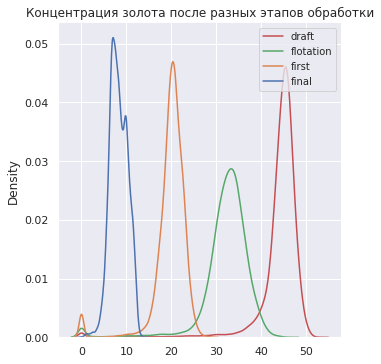

In [25]:
AU = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
            'final.output.concentrate_au']]
sns.displot(AU, legend=False, kind='kde')
plt.legend(['draft', 'flotation', 'first', 'final'], fontsize=10)
plt.title('Концентрация золота после разных этапов обработки')

Text(0.5, 1.0, 'Концентрация серебра после разных этапов обработки')

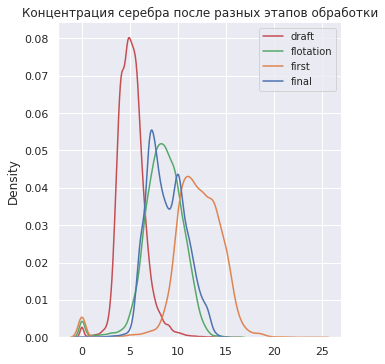

In [26]:
AG = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
            'final.output.concentrate_ag']]
sns.displot(AG, legend=False, kind='kde')
plt.legend(['draft', 'flotation', 'first', 'final'], fontsize=10)
plt.title('Концентрация серебра после разных этапов обработки')

Text(0.5, 1.0, 'Концентрация свинца после разных этапов обработки')

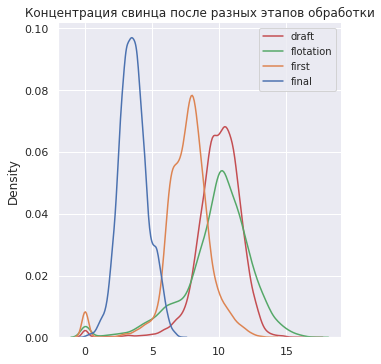

In [27]:
PB = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
            'final.output.concentrate_pb']]
sns.displot(PB, legend=False, kind='kde')
plt.legend(['draft', 'flotation', 'first', 'final'], fontsize=10)
plt.title('Концентрация свинца после разных этапов обработки')

Можно наблюдать, что с каждым этапом очистки концентрация золота заметно увеличивается, в то время как концентрация серебра наоборот снижается. Свинец показывает небольшое увелечение концентрации.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

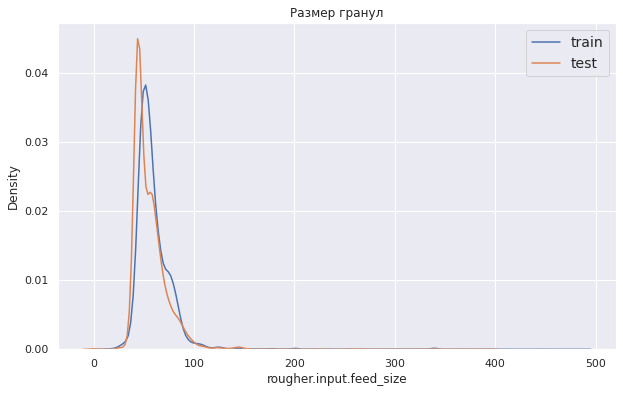

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['rougher.input.feed_size'], hist=False, kde=True, label='train')
sns.distplot(df_test['rougher.input.feed_size'], hist=False, kde=True, label='test')
plt.title('Размер гранул')
plt.legend(prop={'size': 14})
plt.show()

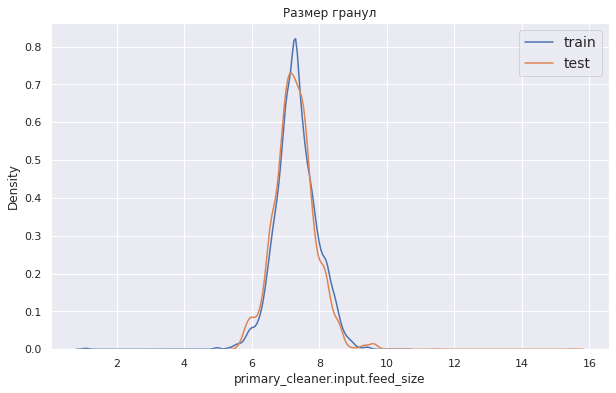

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['primary_cleaner.input.feed_size'], hist = False, kde = True, label = 'train')
sns.distplot(df_test['primary_cleaner.input.feed_size'], hist = False, kde = True,label = 'test')
plt.title('Размер гранул')
plt.legend(prop={'size': 14})
plt.show()

Графики почти не отличаются, значит предобработка выполнена корректно и можно обучать модель на этих данных.

Посмотрим суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

- rougher.input.feed_ - черновой концентрат до флотации в сырье
- rougher.output.concentrate_ - черновой концентрат после флотации
- final.output.concentrate_ - финальный концентрат после всех этапов

In [30]:
feed_concentrate = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] +\
            df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_au']
rougher_concentrate = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] +\
            df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
final_concentrate = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] +\
            df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']

Text(0, 0.5, 'Соотношение')

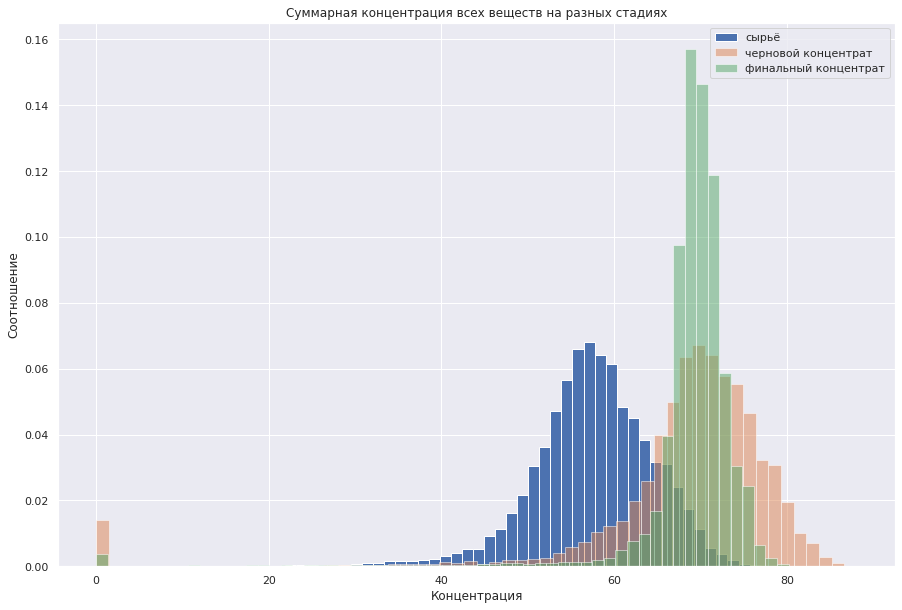

In [31]:
feed_concentrate.hist(figsize=(15, 10), bins=60, alpha=1, density=True)
rougher_concentrate.hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
final_concentrate.hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
plt.legend(['сырьё', 'черновой концентрат', 'финальный концентрат'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Концентрация')
plt.ylabel('Соотношение')

Создадим новую таблицу, чтобы далее убрать аномалии.

In [32]:
# создаём списки для заполнения таблицы
col_list = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']
sub_list = ['au', 'ag', 'pb', 'sol']

# новая таблица для заполнения и наглядности
df_con = pd.DataFrame()
df_con['date'] = df_full['date']

# выбираем нужные столбцы
for col1 in col_list:
    for sub in sub_list:
        for col2 in df_full.columns:
            if (col1 + sub) in col2:
                df_con[col2] = df_full[col2]
            
df_con['rougher.input.feed'] = (
    df_con['rougher.input.feed_au'] +
    df_con['rougher.input.feed_ag'] +
    df_con['rougher.input.feed_pb'] +
    df_con['rougher.input.feed_sol']
)

df_con['rougher.output.concentrate'] = (
    df_con['rougher.output.concentrate_au'] +
    df_con['rougher.output.concentrate_ag'] +
    df_con['rougher.output.concentrate_pb'] +
    df_con['rougher.output.concentrate_sol']
)

df_con['final.output.concentrate'] = (
    df_con['final.output.concentrate_au'] +
    df_con['final.output.concentrate_ag'] +
    df_con['final.output.concentrate_pb'] +
    df_con['final.output.concentrate_sol']
)

In [33]:
delete_rows = []

# заполняем
for row in df_con.index:
    if (df_con.loc[row, 'final.output.concentrate'] < 5 or
        df_con.loc[row, 'rougher.output.concentrate'] < 5 or 
        df_con.loc[row, 'rougher.input.feed'] < 5):
        delete_rows.append(df_con.loc[row, 'date'])
        
# удалим строки с нулевой концентрацией во всех выборках
df_full.drop(df_full[df_full['date'].isin(delete_rows)].index, inplace=True)
df_train.drop(df_train[df_train['date'].isin(delete_rows)].index, inplace=True)
df_test.drop(df_test[df_test['date'].isin(delete_rows)].index, inplace=True)

Удалили выброс около нуля. Они могут повлиять на выборку, поэтому мы их удалим.

**Вывод:**

1. Концентрация золота увеличивается после всех этапов обработки. Концентрация серебра сначала увеличивается после флотации, затем уменьшается послей первой очистки. Концентрация свинца увеличивается после всех этапов обработки.
2. Распределения размеров гранул сырья на обучающей и тестовой выборках примерно одинаковы, значит можно приступать к модели.
3. Удалили околонулевые значения, тк они могут повлиять на модель

## Модель

Построим несколько моделей, на которых применим метрику sMAPE. Выберем лучшую.

sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Используем следующие формулы метрик качества:

![Без имени.png](<attachment:Без имени.png>)
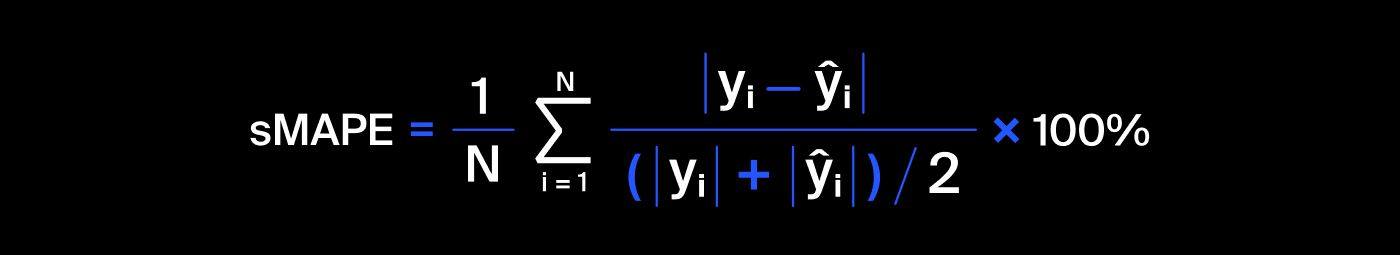
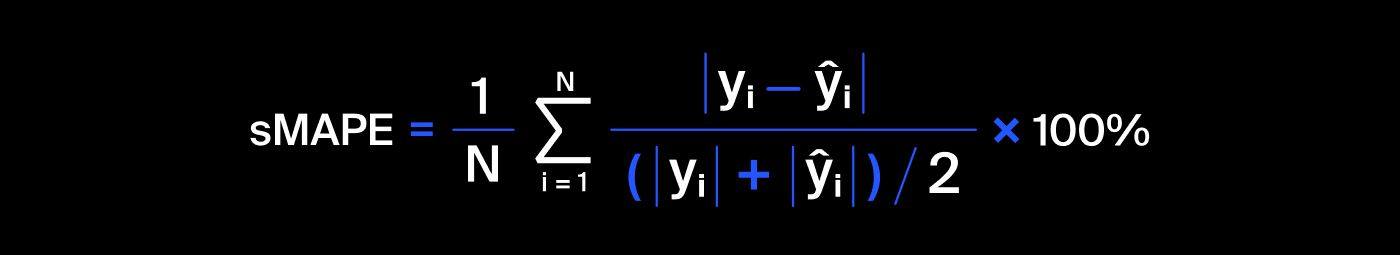

![Без имени.png](<attachment:Без имени.png>)
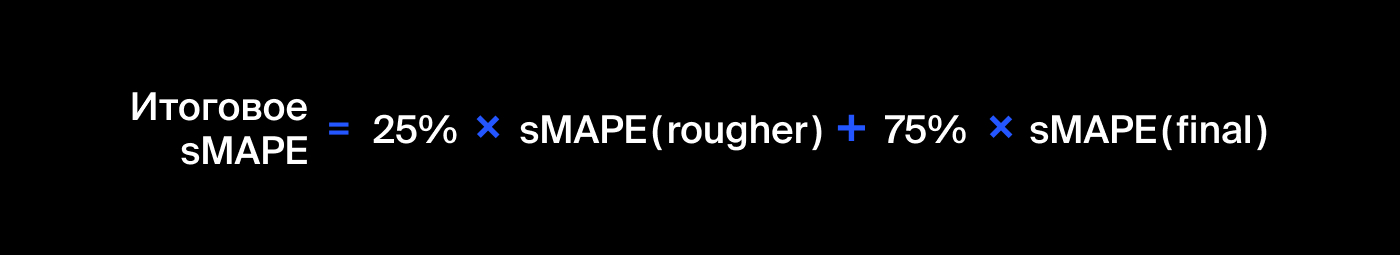
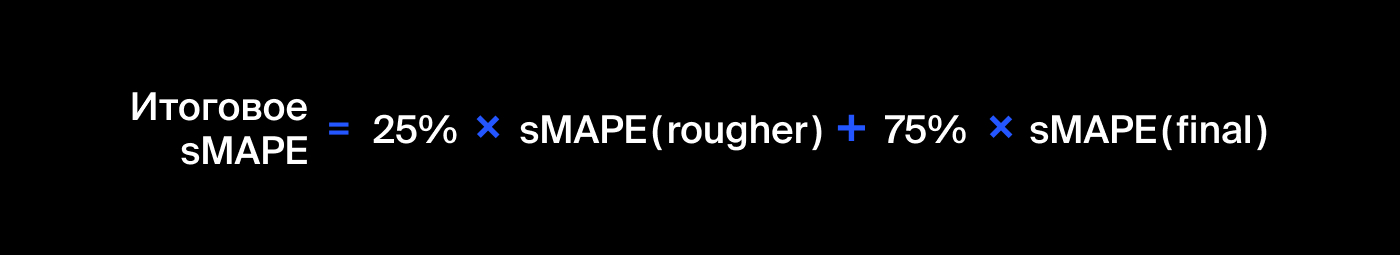

In [34]:
def sMAPE(y_true, y_pred):
    sMAPE = (sum(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) / len(y_true)) * 100
    return sMAPE

In [35]:
def final_sMAPE(target, target_predictions):
    target_rougher = target['rougher.output.recovery']
    target_final = target['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * sMAPE(target_rougher, target_predictions_rougher) \
        + 0.75 * sMAPE(target_final, target_predictions_final)

In [36]:
smape_score = make_scorer(sMAPE, greater_is_better=False)

Выделим target и features в тренировочной выборке. К тестовой вернемся после моделей. Удалим из df_train столбики, которых нет в тестовой выборке.

In [37]:
STATE = np.random.RandomState(12345) # константа

In [38]:
# out_of_reach - список со столбиками, которых нет в df_test
features_train = df_train.drop(out_of_reach, axis=1) 
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features_train) 
features_train = scaler.transform(features_train)

**Линейная регрессия**

In [39]:
model = LinearRegression()
scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape_score, cv=5) 
scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape_score, cv=5) 
final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 10.027031314899265


**Дерево решений**

In [40]:
%%time

best_model = None
best_score = 10000
best_depth = 0

for depth in tqdm(range(1, 11, 1)):
    model = DecisionTreeRegressor(random_state=STATE, max_depth=depth) 
    #model.fit(features_train, target_train)
    scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape_score, cv=5) 
    scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape_score, cv=5) 
    final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
    if final_score < best_score:
        best_model = model
        best_score = final_score
        best_depth = depth
        
print(f'Средняя оценка качества модели: {best_score} при max_depth = {best_depth}')

100%|██████████| 10/10 [00:29<00:00,  2.96s/it]

Средняя оценка качества модели: 8.844134296822679 при max_depth = 3
CPU times: user 29.4 s, sys: 141 ms, total: 29.5 s
Wall time: 29.7 s


**Случайный лес**

In [41]:
%%time

best_model = None
best_score = 10000
best_est = 0
best_depth = 0

for est in tqdm(range(10, 51, 10)):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=STATE, n_estimators=est, max_depth=depth)
        #model.fit(features_train, target_train)
        scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape_score, cv=5) 
        scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape_score, cv=5) 
        final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()        
        if final_score < best_score:
            best_model = model
            best_score = final_score
            best_est = est
            best_depth = depth

print(f'Средняя оценка качества модели: {best_score} \nКоличество деревьев: {best_est} \nМаксимальная глубина: {best_depth}')

100%|██████████| 5/5 [40:53<00:00, 490.66s/it]

Средняя оценка качества модели: 8.38188488188021 
Количество деревьев: 40 
Максимальная глубина: 4
CPU times: user 40min 42s, sys: 4.36 s, total: 40min 46s
Wall time: 40min 53s


Модель с наименьшим sMAPE - это случайный лес. Сравним его с DummyRegressor и проверим на адекватность.

In [42]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)

scores_r = cross_val_score(dummy_regr, features_train, target_train.iloc[:, 0], scoring=smape_score, cv=5) 
scores_f = cross_val_score(dummy_regr, features_train, target_train.iloc[:, 1], scoring=smape_score, cv=5) 
final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
print('Итоговый sMAPE на dummy:', final_score)

Итоговый sMAPE на dummy: 9.764531391155733


😢 долго обучается(

Теперь займемся тестовой выборкой. Выделим из исходной выборки тестовую. В тестовой, как мы помним, отсутсвуют целевые признаки, но мы можем их восстановить из исходной выборки.

In [43]:
df_full = df_full.sort_values(by='date').ffill()
df_test_new = (
    df_full[df_full['date']
            .isin(df_test['date'])]
    .reset_index(drop=True)
)

features_test = df_test_new.drop(columns=out_of_reach, axis=1)
features_test = scaler.transform(features_test)
target_test = df_test_new[['rougher.output.recovery', 'final.output.recovery']]

Проверяем модель случайного леса на тестовой выборке, сравниваем с dummy.

In [44]:
model_best = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=STATE)
model_best.fit(features_train, target_train)
predictions = model_best.predict(features_test)


final_score = final_sMAPE(target_test, predictions)
print("sMAPE лучшей модели случайного леса:", final_score)

sMAPE лучшей модели случайного леса: 7.062977667636479


**Вывод:**

1. Убрали из обучающей выборки столбцы, которых не было в тестовой.
2. Тестовую выборку восстановили из исходной, тк в тестовой отсутсвовали целевые признаки.
3. Написали функцию sMAPE (симметричное среднее абсолютное процентное отклонение). Чем меньше значение метрики sMAPE, тем лучше модель. (Умножали значение на -1, чтобы привычнее было работать)
4. Обучили линейную регрессию, случайный лес и дерево решений. По метрике sMAPE случаный лес показал лучший результат.
5. Проверили модель на тестовой выборке и сравнили результат с DummyRegressor (проверили на адекватность).

## Вывод

### Подготовка данных

1. Всего 22716 объектов и 87 признаков
2. В тестовой выборке на всех этапах отсутствует информация о хвостовых частях, о доле металлов (кроме повторной очистки), нет признаков обогащения на финальном этапе и этапе флотации, нет данных о некоторых реагентах на этапе флотации.
3. В данных нет явных дубликатов.
4. С типами данных всё окей.
5. MAE для столбца rougher.output.recovery получилось маленькое, значит эффективность обогощения рассчитана верно.
6. Пропущенные значения были заполнены предыдущими значениями, тк данные идут по порядку, по времени.

### Анализ данных

1. Концентрация золота увеличивается после всех этапов обработки. Концентрация серебра сначала увеличивается после флотации, затем уменьшается послей первой очистки. Концентрация свинца увеличивается после всех этапов обработки.
2. Распределения размеров гранул сырья на обучающей и тестовой выборках примерно одинаковы, значит можно приступать к модели.
3. Удалили околонулевые значения, тк они являются выбросами и могут повлиять на обучение модели

### Обучение моделей

1. Восстановили тестовую выборку из исходной.
2. Обучили три модели:
   - случайный лес
   - дерево решений
   - логистическую регрессию
4. По метрике sMAPE (симметричное среднее абсолютное процентное отклонение) наименьшее отклонение показывает случайный лес (~7).
5. Проверили модель на адекватность: у DummyRegressor отклонение больше (~9).